# Visualize colony images from a single .avi video file frame-by-frame

In [1]:
#Dependencies
%matplotlib notebook

import pandas as pd
import numpy as np
import cv2             # OpenCV library

import colony_iomethods as cm    # methods to extract information from the xml files
import xml.etree.ElementTree as ET # for XML properties

from matplotlib import pyplot as plt

## IndexTracker class for skipping through different plots

In [2]:
import tracker as tr

## Locate the folders and import movies frame-by-frame

In [20]:
fname = "3dTimeScan_17h_init_long"
tstr = "t17"

folder = "C:/Users/Tolga/Dropbox/Raw Data/Colony Images - Confocal/02112020/" + fname + "/"
vidfolder = "Videos/"
vidname = fname + "_" + tstr + ".avi"
vidpath = folder + vidfolder + vidname

# Video capture object from cv2
vidcap = cv2.VideoCapture(vidpath)
# Frame properties
frame_count = int(vidcap.get(cv2.CAP_PROP_FRAME_COUNT))
frame_height = int(vidcap.get(cv2.CAP_PROP_FRAME_HEIGHT))
frame_width = int(vidcap.get(cv2.CAP_PROP_FRAME_WIDTH))

# Numpy array to keep image sequence
img_seq = np.zeros((frame_width, frame_height, frame_count)) # careful for dimensions (w x h) OR (h x w)
for frix in range(frame_count):
    success,frame = vidcap.read()
    frame_gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    if not success:
        print("Cannot read the frame from vidcap)")
    img_seq[:,:,frix] = frame_gray

## Locate the xml properties file, and collect th video properties

In [21]:
xml_name = "Metadata/EQ59_Single_Colony_TilesScan.lif_" + fname + "_Properties.xml"
xml_path = folder + xml_name

tree = ET.parse(xml_path)    # xml tree of the current stage position
root = tree.getroot()           # root of the xml tree

image_xml = root[0]

dim_desc = cm.collectImageDim(image_xml)
xsz = dim_desc["xsz"]
ysz = dim_desc["ysz"]
zsz = dim_desc["zsz"]
xvoxel = dim_desc["xvoxel"]
yvoxel = dim_desc["yvoxel"]
zvoxel = dim_desc["zvoxel"]
xunit = dim_desc["xunit"]
yunit = dim_desc["yunit"]
zunit = dim_desc["zunit"]

## Important!! 
### Each frame is scaled from a tilescan of 1024x1024 images, to a final 512x512 in the video.
* Collect the tilescan positions and obtain the scalex and scaley

* Scale xvoxel and yvoxel accordingly


In [22]:
tilescan_desc = cm.collectTileScan(image_xml)

tile_xcnt = tilescan_desc["tile_xcnt"]
tile_ycnt = tilescan_desc["tile_ycnt"]

scalex = 1.0/tile_xcnt/2
scaley = 1.0/tile_ycnt/2

tilescan is set


## Interactive plot for real-time analysis

<IPython.core.display.Javascript object>


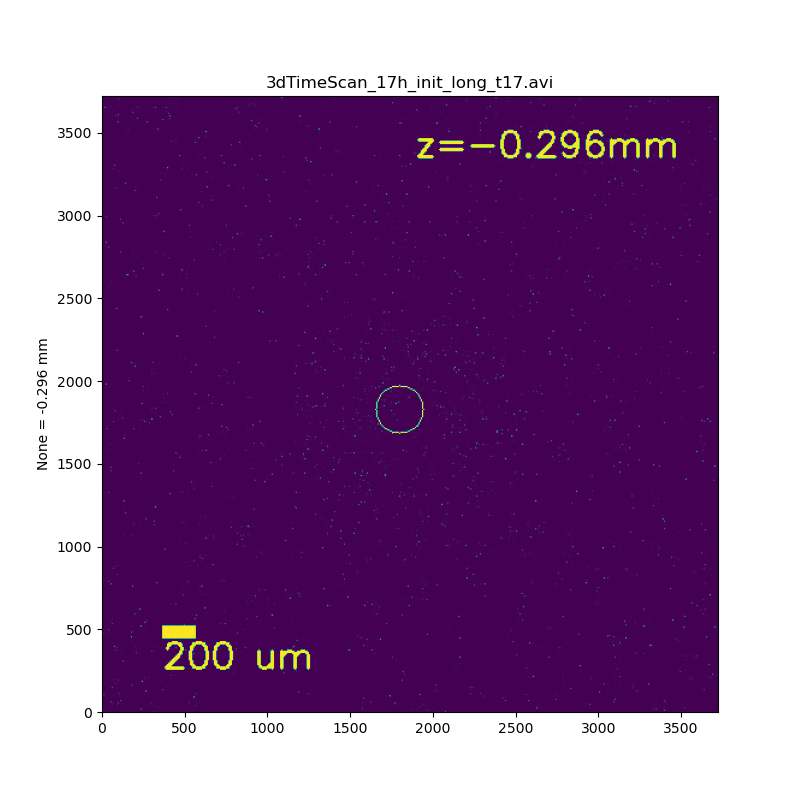

In [23]:
# Define figure and axes
fig, ax = plt.subplots(1,1, figsize=(8,8))

extent = [0, frame_width*xvoxel/scalex, 0, frame_height*yvoxel/scaley] # Extent written for x-y scales
zvals = np.linspace(0,zsz*zvoxel,zsz, endpoint=False)  # array of z values 
# Dictionary to pass into Index Tracker
args_dict = {"extent": extent, "zvals": zvals, "zunit": zunit,
            "title": vidname}

# Plot the image sequence in a figure
img_seq_draw = np.zeros_like(img_seq)
for zix in range(len(zvals)):
    img = img_seq[:,:,zix].copy()
    cv2.circle(img, (247, 260), 20, (255,255,255), 1)
    img_seq_draw[:,:,zix] = img
tracker = tr.IndexTracker(ax, img_seq_draw, args_dict)
fig.canvas.mpl_connect('scroll_event', tracker.onscroll)
plt.show()

In [14]:
1782/xvoxel*scalex

245.04950495049505

In [8]:
img_seq

array([[[0., 0., 0., ..., 0., 0., 3.],
        [0., 0., 0., ..., 0., 0., 2.],
        [0., 0., 0., ..., 0., 0., 8.],
        ...,
        [0., 0., 0., ..., 0., 1., 0.],
        [0., 0., 0., ..., 1., 1., 0.],
        [0., 0., 0., ..., 4., 1., 3.]],

       [[0., 0., 0., ..., 0., 0., 3.],
        [0., 0., 0., ..., 0., 0., 1.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 1., 0.],
        [0., 0., 0., ..., 2., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 2.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 1., 0.],
        [0., 0., 0., ..., 0., 0., 5.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 1.],
        [1., 0., 0., ..., 0., 0., 0.],
        [5., 0., 0., ..., 0., 0., 1.],
        ...,
        [0., 0., 2., ..., 2., 0., 0.],
        [0., 0., 0., ..., 2., 0., 0.],
        [0., 0., 2., ..., 0., 0.